### Advent of Code Day 9

#### Input

In [94]:
with open('input.txt') as f:
    lines = [line.strip() for line in f.readlines()]

In [95]:
heightmap = []
max = 0
min = 100**100

for line in lines:
    for digit in line:
        if int(digit) > max:
            max = int(digit)
        if int(digit) < min:
            min = int(digit)
    heightmap.append([int(digit) for digit in line])

#### Task 1

In [96]:
def get_neighbouring_points_value(map: list, point: tuple):
    x, y = point
    NW, NE, NN, NS = None, None, None, None

    if x > 0:
        NW = map[x - 1][y]
    if x < len(map) - 1:
        NE = map[x + 1][y]
    if y > 0:
        NN = map[x][y - 1]
    if y < len(map[1]) - 1:
        NS = map[x][y + 1]

    return NW, NE, NN, NS

In [97]:
def find_risk_points(map: list):
    low_points = []
    risks = []

    for i in range(len(map)):
        for j in range(len(map[i])):
            neighbours = get_neighbouring_points_value(map, (i, j))
            islower = True
            for n in neighbours:
                if n is not None:
                    if map[i][j] >= n:
                        islower = False
            if islower:
                low_points.append([i,j])
                risks.append(map[i][j] + 1)

    return risks

In [98]:
print(sum(find_risk_points(heightmap)))

548


#### Task 2

In [99]:
def find_low_points(map: list):
    low_points = []
    risks = []

    for i in range(len(map)):
        for j in range(len(map[i])):
            neighbours = get_neighbouring_points_value(map, (i, j))
            islower = True
            for n in neighbours:
                if n is not None:
                    if map[i][j] >= n:
                        islower = False
            if islower:
                low_points.append([i,j])
                risks.append(map[i][j] + 1)

    return low_points

In [100]:
def get_neighbouring_points(map: list, point: tuple):
    x, y = point
    NW, NE, NN, NS = None, None, None, None

    if x > 0:
        # NW = map[x - 1][y]
        NW = [x - 1, y]
    if x < len(map) - 1:
        # NE = map[x + 1][y]
        NE = [x + 1, y]
    if y > 0:
        # NN = map[x][y - 1]
        NN = [x, y - 1]
    if y < len(map[1]) - 1:
        # NS = map[x][y + 1]
        NS = [x, y + 1]

    return NW, NE, NN, NS

In [101]:
def explore_branch(map, point, visited):
    neighbours = get_neighbouring_points(map, point)
    neighbours = [elem for elem in neighbours if elem is not None and elem not in visited and elem != 9]

    for n in neighbours:
        if map[n[0]][n[1]] - 1 == map[point[0]][point[1]] and map[n[0]][n[1]] != 9:
            visited.append(n)
            visited = explore_branch(map, n, visited)
    return visited[:]

In [102]:
def find_basins(map: list):
    basins = []

    for point in find_low_points(heightmap):
        visited = []
        visited.append(point)
        visited = explore_branch(heightmap, point, visited)
        basins.append(visited)
    return basins

In [103]:
def sum_basins_size(map):
    basins = find_basins(map)
    total_size = 1
    print(len(basins))
    # print([len(basin) for basin in basins])
    for basin in sorted(basins, key=len, reverse=True)[:3]:
        # print(len(basin))
        total_size *= len(basin)
    
    return total_size

In [104]:
print(sum_basins_size(heightmap))

235
401800


In [105]:
with open('input.txt') as f:
    lines = f.readlines()

heights = []
for line in lines:
    for d in line.strip():
        heights.append(int(d))

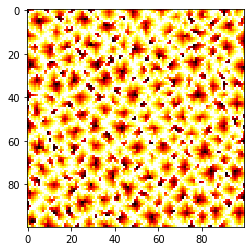

In [106]:
import matplotlib.pyplot as plt
import numpy as np

heights = np.array(heights).reshape(100, 100)
plt.imshow(heights, cmap='hot', interpolation='nearest')
plt.show()